In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating mock data: 2D data

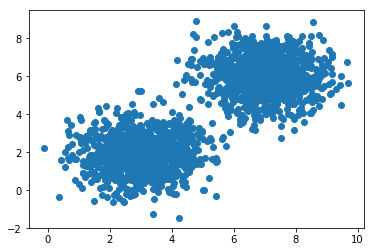

In [4]:
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000) 
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))
plt.scatter(x1s, x2s)

### Hyperparameter setting and sigmoid helper function:

In [5]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
learning_rate = 0.1
training_epochs = 2000

### Building tf graph

In [6]:
X1 = tf.placeholder(tf.float32, shape=(None, ), name="X1")
X2 = tf.placeholder(tf.float32, shape=(None, ), name="X2")
Y = tf.placeholder(tf.float32, shape=(None, ), name="Y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

y_model = tf.sigmoid(w[2]*X2 + w[1]*X1 + w[0])
cost = tf.reduce_mean(-tf.log(y_model*Y + (1-y_model)*(1-Y))) # Cross entropy loss function
train_opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


### Running the graph in session:

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_opt], {X1: x1s, X2: x2s, Y: ys})
        print (epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

0 0.693146
1 0.608517
2 0.601637
3 0.596505
4 0.591523
5 0.586675
6 0.581954
7 0.577356
8 0.572876
9 0.568508
10 0.564248
11 0.560092
12 0.556035
13 0.552073
14 0.548203
15 0.544421
16 0.540722
17 0.537104
18 0.533564
19 0.530098
20 0.526703
21 0.523377
22 0.520118
23 0.516921
24 0.513786
25 0.51071
26 0.50769
27 0.504725
28 0.501811
29 0.498949
30 0.496136
31 0.49337
32 0.490648
33 0.487971
34 0.485337
35 0.482743
36 0.480189
37 0.477673
38 0.475194
39 0.472751
40 0.470343
41 0.467969
42 0.465627
43 0.463317
44 0.461037
45 0.458788
46 0.456567
47 0.454375
48 0.45221
49 0.450071
50 0.447958
51 0.445871
52 0.443808
53 0.441768
54 0.439753
55 0.437759
56 0.435788
57 0.433839
58 0.43191
59 0.430003
60 0.428115
61 0.426247
62 0.424398
63 0.422567
64 0.420755
65 0.418961
66 0.417185
67 0.415426
68 0.413684
69 0.411958
70 0.410248
71 0.408554
72 0.406876
73 0.405213
74 0.403565
75 0.401931
76 0.400313
77 0.398708
78 0.397117
79 0.39554
80 0.393976
81 0.392425
82 0.390888
83 0.389363
84 0.387

### Printing decision boundary:

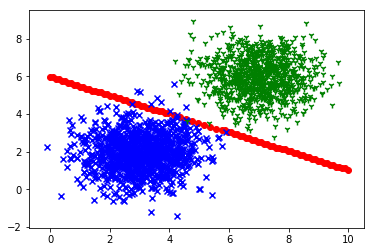

In [22]:
X1_boundary = []
X2_boundary = []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(x2_test*w_val[2] + x1_test*w_val[1]+w_val[0])
        if abs(z - 0.5) < 0.01:
            X1_boundary.append(x1_test)
            X2_boundary.append(x2_test)
plt.scatter(X1_boundary, X2_boundary, c='r', marker='o')
plt.scatter(x1_label1, x2_label1, c='b', marker = 'x')
plt.scatter(x1_label2, x2_label2, c='g', marker='1')